In [1]:
import pandas as pd
import numpy as np
idmode = "partyid"
scaleddf=pd.read_csv('Data_party_qs_removed_enumScale(for q2).csv')
scaleddf.drop(scaleddf.index[scaleddf[idmode] == "Other"],inplace=True)
scaleddf.drop(scaleddf.index[scaleddf[idmode] == "No - none"],inplace=True)
scaleddf.drop(scaleddf.index[scaleddf[idmode] == "Don't know"],inplace=True)
scaleddf.drop(scaleddf.index[scaleddf[idmode] == "Scottish National Party (SNP)"],inplace=True)
scaleddf.drop(scaleddf.index[scaleddf[idmode] == "Plaid Cymru"],inplace=True)
scaleddfnoid = scaleddf.drop(idmode,axis = 1)

label = scaleddf[idmode]
vals = scaleddfnoid.values
print(type(scaleddf))

kmeansdata = scaleddf.drop([idmode],axis =1)
kmeansmatrix = kmeansdata.to_numpy()
scaleddf = scaleddf.reset_index(drop=True)
print(np.unique(label))


<class 'pandas.core.frame.DataFrame'>
['Brexit Party' 'Conservative' 'Green Party' 'Labour' 'Liberal Democrat'
 'United Kingdom Independence Party (UKIP)']


In [144]:
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from purity_check import purity_check

voteorpref = idmode

def f1_cluster_assignments_lists(optimal_cluster_assignments,stage=None):
    data = scaleddf
    optimal_cluster_assignments_names = []
    optimal_cluster_assignments_number = []
    for i in range(optimal_cluster_assignments[0].shape[0]):
        name = data.loc[optimal_cluster_assignments[0][i],idmode]
        cluster_number = optimal_cluster_assignments[1][i]
        
        if stage != None:
            print(name)
            name = name + "_stage_" + str(stage)
        optimal_cluster_assignments_names.append(name)
        optimal_cluster_assignments_number.append(cluster_number)
    return optimal_cluster_assignments_names, optimal_cluster_assignments_number



def kmeans_distance(cluster,data_compare,n_clusters):
    data = scaleddf
    cost_matrix = np.zeros([data_compare.shape[0],n_clusters])
    for i in range(data_compare.shape[0]):
        point_costs = []
        for c in range(n_clusters):
            diss = np.linalg.norm(data_compare[i,:]-cluster[c,:])
            cost_matrix[i,c]=diss
    return cost_matrix


def optimal_cluster_assignments_lists(optimal_cluster_assignments,stage=None):
    #scaleddf = scaleddf.reset_index(drop=True)
    data = scaleddf
    optimal_cluster_assignments_names = []
    optimal_cluster_assignments_number = []
    for i in range(optimal_cluster_assignments[0].shape[0]):
        name = scaleddf.loc[optimal_cluster_assignments[0][i],idmode]
        cluster_number = optimal_cluster_assignments[1][i]
        name_count = 0 
        for x in range(len(optimal_cluster_assignments_names)):
                if name in optimal_cluster_assignments_names[x]:
                    name_count += 1
        if name_count != 0:
            name = name + str(name_count+1)
        if stage != None:
            print(name)
            name = name + "_stage_" + str(stage)
        optimal_cluster_assignments_names.append(name)
        optimal_cluster_assignments_number.append(cluster_number)
    return optimal_cluster_assignments_names, optimal_cluster_assignments_number


"""
def kmpurity2(input,curmethod):
    
    purity_values = [] 
    cluster_numbers = []
    clusters = range(6,10)
    for i in clusters:
        #print(i)
        cluster_numbers.append(i)
        kmeans = KMeans( n_clusters = i, random_state=0)
        kmeans.fit_predict(input)
        kmeans_cost = kmeans_distance(kmeans.cluster_centers_,input,i)
        optimal_assignments = linear_sum_assignment(kmeans_cost)
        #print(optimal_assignments)
        clusterpops = optimal_assignments[0]
        optimal_assignments = optimal_cluster_assignments_lists(optimal_assignments)
        #print(optimal_assignments)
        wrongcounts = list(np.zeros(i+1))
        optimaldict = dict()
        optimaldict2 = dict()
        for i in range(len(optimal_assignments[0])):
            #print(optimal_assignments[1][i])
            optimaldict[optimal_assignments[1][i]]=optimal_assignments[0][i]
            optimaldict2[optimal_assignments[0][i]]=optimal_assignments[1][i]
        #print(optimaldict)
        for i in range(len(optimal_assignments[1])):#for each cluster
            #optimal_assignments[0][i] is ith name
            # optimal_assignments[1][i] is ith cluster num in kmlabels 
            for k in range(len(kmeans.labels_)):#for each value
                #k is original data index
                if optimal_assignments[1][i] != kmeans.labels_[k]:#kth point not assigned to current cluster
                    #if point k not assigned to cluster
                    #dont need to check  its
                    continue
                #by this point kth point is definetly assigned to ith cluster
                if scaleddf[idmode][k] not in optimal_assignments[0][i]:
                    
                    #if correct label not in name from optimal assinments
                    #optimaldict[kmeans.labels_[k]]  maps the label to name 
                    #print(optimaldict2[kmeans.labels_[k]])
                    wrongcounts[optimal_assignments[1][i]]+=1
        
        
        clusterpops = list(np.zeros(len(np.unique(kmeans.labels_))))
        

        for i in kmeans.labels_:
            clusterpops[i]+=1
        #print(clusterpops)
        #print(optimal_assignments[0])
        impurities = np.zeros(len(clusterpops))
        for j in range(len(clusterpops)):
            impurities[j]=(clusterpops[j]-wrongcounts[j])/clusterpops[j]
            
        #mean_purity = purity_check(optimal_assignments[0],scaleddf,i,vote_or_pref=idmode)
        #print("impurity stuff \n")
        #print(impurities)
        #print(wrongcounts)
        #print(clusterpops)
        mean_purity =np.mean(impurities)
        for i in impurities:
            if i > 1:
                print("reeeeeee\n\n\nreeeeeeeee")
                print(impurities)
                
                print(clusterpops)
                print(wrongcounts)
                print(mean_purity)
                print(np.sum(clusterpops))
                print((np.sum(wrongcounts)/np.sum(clusterpops)))
        
        #print(impurities)
                
        
        print(mean_purity)
        purity_values.append(mean_purity)
    
    print(curmethod)
    purities[curmethod]=purity_values.copy()

   
    plt.plot(clusters,purity_values)

"""
#normal k means
"""def kmpurity(input,curmethod):
    purity_values = [] 
    cluster_numbers = []
    for i in range(6,18):
        print(i)
        cluster_numbers.append(i)
        kmeans = KMeans( n_clusters = i+1)
        kmeans.fit_predict(input)
        mean_purity = purity_check(kmeans.labels_,scaleddf,i,vote_or_pref=idmode)
        purity_values.append(mean_purity)
    
    print(curmethod)
    purities[curmethod]=purity_values.copy()

   
    plt.plot(purity_values)
    """




def kmpurity(embedding,curmethod):
    clusters = range(6,18)
    data = scaleddf
    labels = scaleddf[idmode]
    f1values=[]
    purity_values=[]
    for n_clusters in clusters:
        kmeans = KMeans(n_clusters, random_state=0)
        kmeans.fit_predict(embedding)
        kmeans_cost = kmeans_distance(kmeans.cluster_centers_,embedding,n_clusters)
        optimal_assignments = linear_sum_assignment(kmeans_cost)
        cluster_assignments_names, cluster_assignments_number = f1_cluster_assignments_lists(optimal_assignments)
        cluster_assignments = pd.DataFrame({'Party Vote':data[idmode]})
        cluster_assignments['FirstAssignment'] = kmeans.labels_
        for x in range(len(cluster_assignments_number)):
            cluster_assignments['FirstAssignment'] = cluster_assignments['FirstAssignment'].replace(int(cluster_assignments_number[x]),cluster_assignments_names[x])
        cluster_assignments['FirstAssignment'] = cluster_assignments['FirstAssignment'].astype('category')
        #cluster_assignments['FirstAssignment'] = cluster_assignments['FirstAssignment'].cat.remove_unused_categories()
        #cluster_assignments['Party Vote'] = cluster_assignments['Party Vote'].cat.remove_unused_categories()
        #sum_of_squared_distances.append(kmeans.inertia_)
        y_true = np.transpose(np.array(cluster_assignments['Party Vote']))
        y_pred = np.transpose(np.array(cluster_assignments['FirstAssignment']))
        f1 = f1_score(y_pred,y_true,average='micro')
        f1values.append(f1)
        mean_purity = purity_check(kmeans.labels_,scaleddf,n_clusters,vote_or_pref=idmode)
        purity_values.append(mean_purity)
        print(mean_purity)
    print(curmethod)
    purities[curmethod]=purity_values.copy()
    f1s[curmethod]=f1values.copy()
    fig, ax = plt.subplots(2, sharex=True)
    ax[0].plot(clusters, purity_values)
    ax[0].set_title('Purity')
    print(f1values)
    print(np.shape(f1values))
    ax[1].plot(clusters,f1values)
    ax[1].set_title("f1 Scores")
    

#f1s=dict()
#purities = dict()

In [ ]:
scaleddf = scaleddf.reset_index(drop=True)
data = scaleddf
purities = dict()
f1s=dict()

In [ ]:
print(type(purities))
print(np.shape(purities))
print(purities)
for i in purities.keys():
    plt.plot(range(6,18),purities[i],label = i)
    
    plt.legend()
plt.xlabel("Number of Clusters")
plt.ylabel("Purity of Clusters")

plt.title("Comparison of Kmeans Purities with Dim Reduction")

IndexError: index 2 is out of bounds for axis 0 with size 2

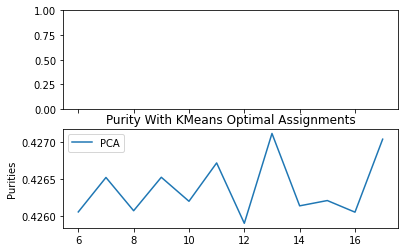

In [152]:
fig, ax = plt.subplots(2, sharex=True)
clusters = range(6,18)
for i in purities.keys():
    ax[0].plot(clusters,purities[i],label = i)
    ax[0].set_title("Purity With KMeans Optimal Assignments")
    ax[0].legend()
    ax[0].set_ylabel("Purities")
    ax[1].plot(clusters,f1s[i],label = i)
    ax[1].set_title("F1 With KMeans Optimal Assignments")
    ax[1].legend()
    ax[1].set_xlabel("Number of Clusters")
    ax[1].set_ylabel("F1 Scores")

0.42606024911545787
0.4265239614744295
0.4260762389396965
0.42652658374293634
0.42620348881544334
0.42671960543930854
0.4259069799615928
0.42711632303789987
0.42614203793378824
0.42621335751536293
0.42605699482737003
0.42703914478306215
PCA
[0.11867040794301749, 0.2857759551046838, 0.3389164688107058, 0.37802719620116554, 0.3906755881718109, 0.33067127131448304, 0.26647960284912586, 0.2481761277789769, 0.35104683790200736, 0.3783725447873948, 0.33252751996546515, 0.3396935031297216]
(12,)


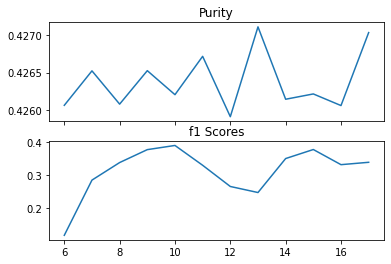

In [136]:
from sklearn.decomposition import PCA
pcadata = PCA(n_components=2).fit_transform(kmeansmatrix)
purity_values = [] 
cluster_numbers = []
kmpurity(pcadata,"PCA")



In [137]:
#kmeansdata = scaleddf.drop(['generalelectionVote','envirogrowth','immigcultural','immigself','immigecon','euintegrationself','happyeuleave'])


In [138]:
"""
purity_values = [] 
cluster_numbers = []
for i in range(6,18):
    print(i)
    cluster_numbers.append(i)
    kmeans = KMeans( n_clusters = i+1)
    kmeans.fit_predict(kmeansmatrix)
    mean_purity = purity_check(kmeans.labels_,scaleddf,i,vote_or_pref=idmode)
    purity_values.append(mean_purity)"""

'\npurity_values = [] \ncluster_numbers = []\nfor i in range(6,18):\n    print(i)\n    cluster_numbers.append(i)\n    kmeans = KMeans( n_clusters = i+1)\n    kmeans.fit_predict(kmeansmatrix)\n    mean_purity = purity_check(kmeans.labels_,scaleddf,i,vote_or_pref=idmode)\n    purity_values.append(mean_purity)'

0.4263215525637288
0.4263286186396801
0.4262164363217643
0.4265002939823691
0.4263341196065345
0.42665273698833506
0.42607633223619246
0.42726858460925815
0.42637132107126857
0.42609636513383997
0.4263370749545635
0.4264829241213561
No Dim Reduction
[0.3472480034534859, 0.2920353982300885, 0.3604575868767537, 0.3275199654651414, 0.3681847614936326, 0.33123246276710555, 0.2679905029138787, 0.3965033455644291, 0.36727822145478095, 0.36283185840707965, 0.37699115044247783, 0.2699330887114181]
(12,)


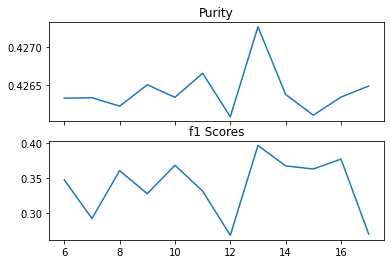

In [139]:
kmpurity(kmeansmatrix,"No Dim Reduction")

0.4261133146594358
0.4260944339502372
0.42640371680927663
0.42540557222008435
0.4263844946183776
0.4257648500612255
0.4261686218958531
0.42602815492303947
0.42636196921308755
0.4275627342646822
0.42682124181831926
0.42804460293433844
TSNE
[0.2730412259874811, 0.23993093028275417, 0.3249298510684222, 0.28909993524714006, 0.37004101014461477, 0.346729980574142, 0.2789553205266566, 0.3063241959853227, 0.30887114180876324, 0.3129721562702353, 0.3455212605223397, 0.2656593999568314]
(12,)


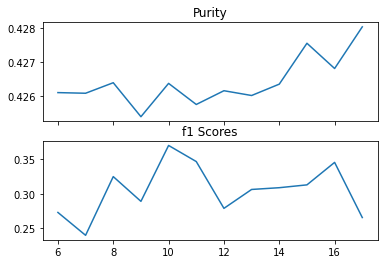

In [141]:
from sklearn.manifold import TSNE
tsnedata = TSNE(n_components=2).fit_transform(kmeansmatrix)
purity_values = [] 
cluster_numbers = []
kmpurity(tsnedata,"TSNE")

0.6649673654302224
0.6654753376576779
0.7148404606372758
0.7166343029974042
0.7285343636710693
0.7239251759332634
0.7232202808075355
0.7032136820058015
0.6950562812033528
0.7162921525642647
0.703477929043355
0.7237353503650011
LDA to 5D
[0.799007122814591, 0.7893373624001727, 0.8082883660695014, 0.8012950571983596, 0.8123462119576949, 0.7822577163824735, 0.7132311677099071, 0.6979926613425427, 0.6843945607597669, 0.7993956399740989, 0.7812216706237859, 0.798014245629182]
(12,)


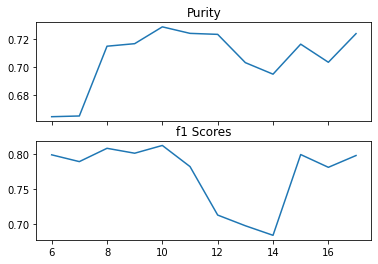

In [145]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=5)
lda5ddata = lda.fit_transform(kmeansdata,scaleddf[idmode])
kmpurity(lda5ddata,"LDA to 5D")




0.7251338295126507
0.7329030114398273
0.7312853128012174
0.7159945946091313
0.7237083178282779
0.7206252694708097
0.7322225857061153
0.7464701810742084
0.7470478858072702
0.7299359584301401
0.7383028307014731
0.7367344825022359
NCA
[0.7735808331534644, 0.7877401251888625, 0.6599179797107706, 0.7708612130369091, 0.716123462119577, 0.6971292898769695, 0.7156054392402331, 0.7171595078782647, 0.6203323980142457, 0.7803582991582129, 0.6454133390891431, 0.7434060004316858]
(12,)


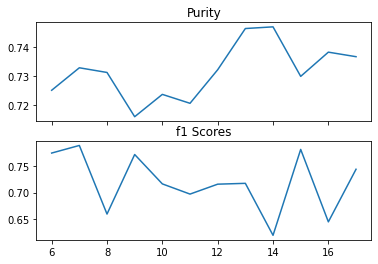

In [146]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

nca = NeighborhoodComponentsAnalysis(n_components=2)
ncadata =nca.fit_transform(kmeansdata,scaleddf[idmode])
kmpurity(ncadata,"NCA")


In [147]:
"""u_labels = np.unique(scaleddf[idmode])
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()
for i in u_labels:
    if i == "No - none" or i == "Don't know"or i =='Scottish National Party (SNP)' or i == "Plaid Cymru":
        continue
    #ax.scatter(x[label == i , 0] ,x[label == i , 1],  x[label == i , 2], label = i,s=1)
    ax.scatter(ldadata[label == i , 0] ,ldadata[label == i , 1], label = i,s=1)
    plt.legend(markerscale =6)
    
plt.show()"""

'u_labels = np.unique(scaleddf[idmode])\nfig = plt.figure(figsize=(20,20))\nax = fig.add_subplot()\nfor i in u_labels:\n    if i == "No - none" or i == "Don\'t know"or i ==\'Scottish National Party (SNP)\' or i == "Plaid Cymru":\n        continue\n    #ax.scatter(x[label == i , 0] ,x[label == i , 1],  x[label == i , 2], label = i,s=1)\n    ax.scatter(ldadata[label == i , 0] ,ldadata[label == i , 1], label = i,s=1)\n    plt.legend(markerscale =6)\n    \nplt.show()'

C:\Users\kiera\anaconda3\envs\intro_to_ai\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.4711730734014326
0.4533613812112531
0.4482997619767559
0.4563001824596056
0.45281458752579945
0.4968475701804211
0.4958054301605594
0.5069424634541003
0.5026631070348961
0.5133957276277947
0.5256602213156004
0.5829743259440945
QDA
[0.11823872221023095, 0.11741851931793654, 0.42641916684653575, 0.4270235268724369, 0.4266781782862076, 0.4244765810489963, 0.42706669544571557, 0.42723936973883014, 0.13205266565939996, 0.12885819123677963, 0.12967839412907403, 0.1297215627023527]
(12,)


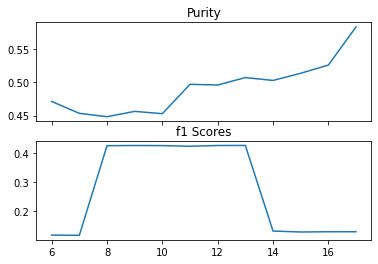

In [148]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis().fit(kmeansdata,scaleddf[idmode])
qdadata = clf.decision_function(kmeansdata)
kmpurity(qdadata,"QDA")

0.7046963296063349
0.6806468109986769
0.6842248128373898
0.6921657482734833
0.6733936743075244
0.7179408220965572
0.7572522000482073
0.759738729616535
0.7474853693624955
0.7776298730120911
0.7745785321528098
0.7546951565152192
LDA Then QDA
[0.7472480034534859, 0.5656809842434708, 0.31279948197712065, 0.3030865529894237, 0.6916900496438593, 0.7060651845456508, 0.4161450464062163, 0.6099719404273689, 0.7193611051154759, 0.5017051586445068, 0.5262680768400604, 0.7283833369307146]
(12,)


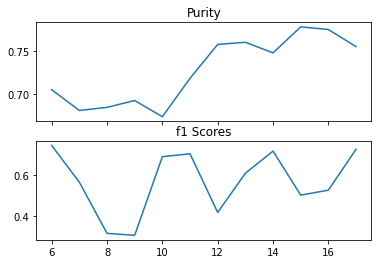

In [149]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=5)
ldadata = lda.fit_transform(kmeansdata,scaleddf[idmode])
clf = QuadraticDiscriminantAnalysis().fit(ldadata,scaleddf[idmode])
ldaqdadata = clf.decision_function(ldadata)
kmpurity(ldaqdadata,"LDA Then QDA")

0.7260426120697847
0.7338682921672705
0.7326097431290071
0.7137339710393155
0.7242085656998956
0.7346118176230271
0.7332466044313319
0.7409224904776079
0.7463029684518009
0.7382999842449239
0.7361538067289951
0.7390842417416986
LDA
[0.7731059788473991, 0.7880423052018131, 0.78717893373624, 0.6241312324627671, 0.7203971508741636, 0.6596589682710986, 0.7679689186272394, 0.6873300237427153, 0.6631987912799482, 0.6692423915389596, 0.7010144614720484, 0.7799266134254262]
(12,)


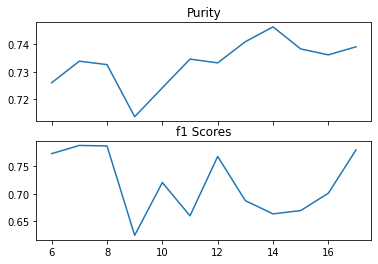

In [150]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
ldadata = lda.fit_transform(kmeansdata,scaleddf[idmode])
kmpurity(ldadata,"LDA")

